### Setup

In [1]:
import importlib
import analysis_functions
from analysis_functions import *

%load_ext autoreload
%autoreload 2

/Users/ariliu/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/ibllib/atlas/__init__.py:205: DeprecationWarning: ibllib.atlas is deprecated. Please install iblatlas using "pip install iblatlas" and use this module instead
  warnings.warn('ibllib.atlas is deprecated. Please install iblatlas using "pip install iblatlas" and use '


In [2]:
importlib.reload(analysis_functions)
from analysis_functions import *

In [3]:
# set parameters

ptype = 'p_mean_c'
combined_p = True
sc_threshold = 0.0
slope_threshold = 0.05
amp_loc_threshold = 67
n = 20

### plot sc region histogram

In [345]:
sc_threshold = 0.0
slope_threshold = 0.05
amp_loc_threshold = 67
n = 20
times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act']
ptype = 'p_mean_c'
alpha = 0.01

res = get_sc_table(times, ptype, alpha=alpha, sc_threshold=sc_threshold, 
                   slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold, n=n)

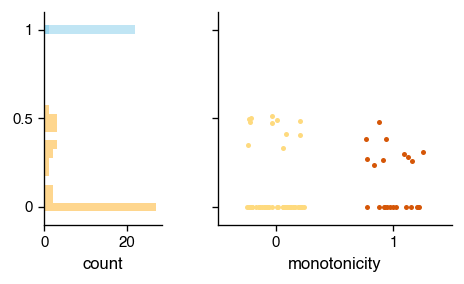

In [346]:
sc_duringstim = np.array(res['sc_duringstim'])
sc_duringchoice = np.array(res['sc_duringchoice'])
# sc_duringstim_mv = np.array(res['sc_duringstim_move_shape'].fillna(0))
sc_duringchoice_mv = np.array(res['sc_duringchoice_move_shape'].fillna(0))

# Fill NaNs only in the binary mv variables
# sc_duringstim_mv = np.nan_to_num(sc_duringstim_mv, nan=0)
sc_duringchoice_mv = np.nan_to_num(sc_duringchoice_mv, nan=0)

sc_duringstim_mv = np.zeros_like(sc_duringstim, dtype=float)

# Build DataFrames
df_stim = pd.DataFrame({
    "sc_duringstim_mv": sc_duringstim_mv,
    "sc_duringstim": sc_duringstim
})
df_choice = pd.DataFrame({
    "sc_duringchoice_mv": sc_duringchoice_mv,
    "sc_duringchoice": sc_duringchoice
})

# Highlight subsets
move_choice = df_choice[res['sc_duringchoice_regtype']==1]
stim_choice = df_choice[res['sc_duringchoice_regtype']==0]
int_choice = df_choice[res['sc_duringchoice_regtype']==0.5]
move_stim = df_stim[res['sc_duringstim_regtype']==1]
stim_stim = df_stim[res['sc_duringstim_regtype']==0]
stim_stim1 = df_stim[res['sc_duringstim_regtype']==0.1]
int_stim = df_stim[res['sc_duringstim_regtype']==0.5]

fig, axes = plt.subplots(1, 2, figsize=(4.5, 3), dpi=120, gridspec_kw={'width_ratios': [1, 2]}, sharey=True)

# sns.stripplot(
#     x="sc_duringstim_mv", y="sc_duringstim", data=int_stim,
#     color='#fec65f', jitter=0.25, ax=axes[0], size=3
# )

# sns.stripplot(
#     x="sc_duringstim_mv", y="sc_duringstim", data=move_stim,
#     color='#fec65f', jitter=0.25, ax=axes[0], size=3
# )

# sns.stripplot(
#     x="sc_duringstim_mv", y="sc_duringstim", data=stim_stim,
#     color='#57C1EB', jitter=0.25, ax=axes[0], size=3
# )

bin_centers = np.linspace(0, 1, 21)  # centers exactly at 0, 0.1, ..., 1
bin_width = bin_centers[1] - bin_centers[0]
bin_edges = np.concatenate(([bin_centers[0] - bin_width/2], bin_centers + bin_width/2))

inv_move_stim = 1 - pd.concat([int_stim["sc_duringstim"], move_stim["sc_duringstim"]])
inv_stim_stim = 1 - stim_stim["sc_duringstim"]
inv_stim_stim1 = 1 - stim_stim1["sc_duringstim"]
axes[0].hist(inv_move_stim, orientation='horizontal',
             color='#fec65f', alpha=0.7, bins=bin_edges)
axes[0].hist(inv_stim_stim, orientation='horizontal',
             color='#57C1EB', alpha=0.7, bins=bin_edges)
# offset the lighter bars slightly upward so they appear above inv_stim_stim
bin_shift = (bin_edges[1] - bin_edges[0]) / 4
axes[0].hist(inv_stim_stim1 + bin_shift, orientation='horizontal',
             color='#A6DBF0', alpha=0.7, bins=bin_edges)

# Invert y-values (1 - original)
int_choice_inv = int_choice.copy()
move_choice_inv = move_choice.copy()
stim_choice_inv = stim_choice.copy()

for df in [int_choice_inv, move_choice_inv, stim_choice_inv]:
    df["sc_duringchoice"] = 1 - df["sc_duringchoice"]

sns.stripplot(
    x="sc_duringchoice_mv", y="sc_duringchoice", data=int_choice_inv,
    color='#feda7e', jitter=0.25, ax=axes[1], size=3
)

sns.stripplot(
    x="sc_duringchoice_mv", y="sc_duringchoice", data=move_choice_inv,
    color='#d55607', jitter=0.25, ax=axes[1], size=3
)

sns.stripplot(
    x="sc_duringchoice_mv", y="sc_duringchoice", data=stim_choice_inv,
    color='#57C1EB', jitter=0.25, ax=axes[1], size=3
)

# axes[0].set_title("s_a")
# axes[1].set_title("m_a")

for ax in axes:
    # ax.axhline(sc_threshold, color="black", linestyle="--", linewidth=1)
    # ax.set_ylabel(r'$\sum$ choice', fontsize=10)
    ax.set_ylabel('')
    ax.tick_params(labelsize=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_facecolor('none')
    ax.set_ylim(-0.1, 1.1)
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels([0, 0.5, 1])

# axes[0].set_xlabel('')
# axes[0].set_xticks([])
# axes[0].set_xticklabels([])
axes[1].set_xticks([0, 1])
axes[1].set_xlim(-0.5, 1.5)
axes[1].set_xticklabels([0, 1])

axes[0].set_xlabel('count', fontsize=10)
axes[1].set_xlabel('monotonicity', fontsize=10)

fig.tight_layout(pad=3)

save_dir = '/Users/ariliu/Desktop/ibl-figures'
fig.savefig(f'{save_dir}/sc_strip_{alpha}.svg', transparent=True)

In [ ]:
sc_duringstim = np.array(res['sc_duringstim'])
sc_duringchoice = np.array(res['sc_duringchoice'])
# sc_duringstim_mv = np.array(res['sc_duringstim_move_shape'].fillna(0))
sc_duringchoice_mv = np.array(res['sc_duringchoice_move_shape'].fillna(0))


fig, axs = plt.subplots(1,2, sharey=True, figsize=(4,2),dpi=120)

axs[0].hist(sc_duringstim)
axs[1].hist(sc_duringchoice)
for ax in axs:
    ax.set_xlabel(r'$\sum$ choice', fontsize=10)
    ax.tick_params(labelsize=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axs[0].set_title('during stim')
axs[1].set_title('during choice')
axs[0].set(ylabel='num regions')
fig.tight_layout

save_dir = '/Users/ariliu/Desktop/ibl-figures'
fig.savefig(f'{save_dir}/sc_hist.pdf')

# decoding & projection of trajectories

In [ ]:
def plot_proj_along_direction(reg, splits, colors, direction, pc=False,
                              method='manifold', control=False):
    
    # load in decoding result to get choice/stim vector
    pth = Path(one.cache_dir, 'decoding')
    if method=='manifold':
        pth = Path(one.cache_dir, 'manifold', 'traj_new')
        r = np.load(Path(pth, f'traj_{reg}_{direction}.npy'), allow_pickle=True)
        r0 = r[:,0,:]
        r1 = r[:,1,:]

        d = (r0-r1)**2
        d1 = np.sum(d, axis=0)
        maxd = max(d1)
        maxidx = list(d1).index(maxd)
        c_vec1 = d[:,maxidx]
    else:
        if method=='decoding':
            x = np.load(Path(pth, f'{direction}_{reg}_original.npy'), allow_pickle=True).flatten()[0]
        elif method=='decoding_pc':
            x = np.load(Path(pth, f'{direction}_{reg}.npy'), allow_pickle=True).flatten()[0]
        else:
            print('what method to define proj direction?')
            return

        if control:
            c_vec1 = x['avg_peth']
        else:
            max_acc = max(x['accuracy'])
            idx = x['accuracy'].index(max_acc)
            c_vec = x['readout'][idx]
            c_vec1 = np.concatenate(c_vec)


    labels = ['clbl', 'clbr', 'crbl', 'crbr']

    i = 0
    for split in splits:
        # load in trajectory data
        if 'pc' in method:
            pth_r = Path(one.cache_dir, 'manifold', reg)
        else:
            pth_r = Path(one.cache_dir, 'manifold', 'traj_new')
        r = np.load(Path(pth_r, f'traj_{reg}_{split}.npy'), allow_pickle=True)
        #print(r.shape)
        ntimes = r.shape[2]
        r0 = r[:,0,:] #condition L trajectory
        r1 = r[:,1,:] #condition R trajectory
    
        if pc:
            # pca to transform data onto same space
            a = np.concatenate([r0,r1], axis=1)
            a = a.transpose() # shape of ntimes*2, ncells
            a = np.append(a, c_vec, axis=0) # append c_vec together here for pca
            
            from sklearn.decomposition import PCA
            pca = PCA(n_components=None)
            a_pc = pca.fit_transform(a)
            var = pca.explained_variance_ratio_
            r0 = a_pc[:ntimes] #condition L trajectory in pc space
            r1 = a_pc[ntimes:ntimes*2] #condition R trajectory in pc spacec
            c_vec1 = a_pc[-1]
        else:
            r0 = r0.transpose()
            r1 = r1.transpose()
    
        bl = np.dot(r0,c_vec1)
        br = np.dot(r1,c_vec1)
        xx = np.linspace(-pre_post[split][0], 
                         pre_post[split][1], 
                         len(bl))
        plt.plot(xx, bl, c=colors[i])
        plt.plot(xx, br, c=colors[i+1])
        i+=2
    
    plt.legend(labels)
    plt.title(reg)
    plt.show()

In [ ]:
reg = 'GRN'
splits = ['block_duringstim_r_choice_r_f1', 'block_duringstim_l_choice_l_f1',
          'block_stim_r_duringchoice_r_f1', 'block_stim_r_duringchoice_r_f1',
          'block_stim_r_choice_r_f1', 'block_stim_l_choice_l_f1'
         ]
for split in splits:
            #pth_r = Path(one.cache_dir, 'manifold', reg)
            pth_r = Path(one.cache_dir, 'manifold', 'traj_new')
            r = np.load(Path(pth_r, f'traj_{reg}_{split}.npy'), allow_pickle=True)
            r0 = r[:,0,:]
            r1 = r[:,1,:]
            print(split, r0.shape, r1.shape)

In [ ]:
reg = 'GRN'
splits = ['block_duringstim_l_choice_l_f1', 'block_duringstim_r_choice_r_f1',
          'block_stim_l_duringchoice_l_f1', 'block_stim_r_duringchoice_r_f1',
          #'block_stim_l_duringchoice_l_f1_long', 'block_stim_r_duringchoice_r_f1_long',
          #'block_stim_l_choice_l_f1', 'block_stim_r_choice_r_f1'
          #'block_duringstim_l_choice_r_f2', 'block_duringstim_r_choice_l_f2',
          #'block_stim_l_duringchoice_r_f2', 'block_stim_r_duringchoice_l_f2',
         ]
colors = ['b', 'orange', 'c', 'r', 'b', 'orange', 'c', 'r',
           'b', 'orange', 'c', 'r'
          ]

method = 'decoding'
for direction in ['stim', 'choice']:
    plot_proj_along_direction(reg, splits, colors, direction, pc=False, 
                              method=method)
    plot_proj_along_direction(reg, splits, colors, direction, pc=True, 
                              method=method)

In [ ]:
def plot_avg_proj_along_dir(regions, timespan, colors, direction='choice', pc=False,
                            original=True, control=False, test=False):
    pth = Path(one.cache_dir, 'decoding')
    labels = ['clbl', 'crbl', 'clbr', 'crbr']
    if timespan == 'duringchoice':
        splits = ['block_stim_l_duringchoice_l_f1', 'block_stim_r_duringchoice_r_f1']
    elif timespan == 'duringstim':
        splits = ['block_duringstim_l_choice_l_f1', 'block_duringstim_r_choice_r_f1']
    elif timespan == 'duringchoice1':
        splits = ['block_stim_r_duringchoice_l_f2', 'block_stim_l_duringchoice_r_f2']
    elif timespan == 'duringstim1':
        splits = ['block_duringstim_r_choice_l_f2', 'block_duringstim_l_choice_r_f2']
    elif timespan == 'intertrial':
        splits = ['block_stim_l_choice_l_f1', 'block_stim_r_choice_r_f1']
    elif timespan == 'intertrial1':
        splits = ['block_stim_r_choice_l_f2', 'block_stim_l_choice_r_f2']
    else:
        print('timespan?')
        return
    
    i = 0
    for reg in regions:
        # load choice decoding result to get choice direction
        if original:
            x = np.load(Path(pth, f'{direction}_{reg}_original.npy'), allow_pickle=True).flatten()[0]
        else:
            x = np.load(Path(pth, f'{direction}_{reg}.npy'), allow_pickle=True).flatten()[0]
        max_acc = max(x['accuracy'])
        idx = x['accuracy'].index(max_acc)
        c_vec = x['readout'][idx]
        c_vec = np.concatenate(c_vec)
        if control==True:
            c_vec = x['avg_peth']
        if test:
            c_vec = np.ones(len(x['avg_peth']))

        print(reg)
        
        datal, datar = [], []
        for split in splits:        
            
            # load manifold trajectories
            pth_r = Path(one.cache_dir, 'manifold', reg)
            r = np.load(Path(pth_r, f'traj_{reg}_{split}.npy'), allow_pickle=True)
            r0 = r[:,0,:]
            r1 = r[:,1,:]
            print(r0.shape, np.sum(r0), np.sum(r1))
            a = np.concatenate([r0,r1], axis=1)
            a = a.transpose() # shape of ntimes*2, ncells
            ntimes = r0.shape[1]
    
            if pc:
                # pca to transform manifold data onto same space as choice decoding direction
                ndim = min(len(c_vec), a.shape[0], a.shape[1])
                if len(c_vec) > ndim: 
                    # use only the first ndim # of pc to define choice direction
                    c_vec = c_vec[:ndim]
                from sklearn.decomposition import PCA
                pca = PCA(n_components=ndim)
                a_pc = pca.fit_transform(a)
                var = pca.explained_variance_ratio_
                print('var_exp', sum(var))
                r0 = a_pc[:ntimes] # shape of ntimes, npcs
                r1 = a_pc[ntimes:]
            
            bl = np.dot(r0,c_vec)
            br = np.dot(r1,c_vec)
            #bl = np.mean(bl[48:])
            #br = np.mean(br[48:])
            bl = np.mean(bl)
            br = np.mean(br)
            datal.append(bl)
            datar.append(br)
            print('bl', bl, 'br', br)
        
        xx = [0,1,2,3]
        plt.scatter(xx, np.concatenate([datal, datar]), c=colors[i], s=150)
        i+=1
    plt.xticks(xx, labels)
    plt.legend(regions)
    plt.title(timespan)

In [ ]:
def plot_slope_proj_along_dir(regions, timespan, colors, direction='choice', pc=False,
                              original=True, control=False, test=False):
    pth = Path(one.cache_dir, 'decoding')
    labels = ['clbl', 'crbl', 'clbr', 'crbr']
    if timespan == 'duringchoice':
        splits = ['block_stim_l_duringchoice_l_f1', 'block_stim_r_duringchoice_r_f1']
    elif timespan == 'duringstim':
        splits = ['block_duringstim_l_choice_l_f1', 'block_duringstim_r_choice_r_f1']
    elif timespan == 'duringchoice1':
        splits = ['block_stim_r_duringchoice_l_f2', 'block_stim_l_duringchoice_r_f2']
    elif timespan == 'duringstim1':
        splits = ['block_duringstim_r_choice_l_f2', 'block_duringstim_l_choice_r_f2']
    elif timespan == 'intertrial':
        splits = ['block_stim_l_choice_l_f1', 'block_stim_r_choice_r_f1']
    elif timespan == 'intertrial1':
        splits = ['block_stim_r_choice_l_f2', 'block_stim_l_choice_r_f2']
    else:
        print('timespan?')
        return
    
    i = 0
    for reg in regions:
        # load choice decoding result to get choice direction
        if original:
            x = np.load(Path(pth, f'{direction}_{reg}_original.npy'), allow_pickle=True).flatten()[0]
        else:
            x = np.load(Path(pth, f'{direction}_{reg}.npy'), allow_pickle=True).flatten()[0]
        max_acc = max(x['accuracy'])
        idx = x['accuracy'].index(max_acc)
        c_vec = x['readout'][idx]
        c_vec = np.concatenate(c_vec)
        if control==True:
            c_vec = x['avg_peth']
        if test:
            c_vec = np.ones(len(x['avg_peth']))

        print(reg)
        
        datal, datar = [], []
        for split in splits:        
            
            # load manifold trajectories
            pth_r = Path(one.cache_dir, 'manifold', reg)
            r = np.load(Path(pth_r, f'traj_{reg}_{split}.npy'), allow_pickle=True)
            r0 = r[:,0,:]
            r1 = r[:,1,:]
            print(r0.shape, np.sum(r0), np.sum(r1))
            
            if pc:
                # pca to transform manifold data onto same space as choice decoding direction
                ndim = min(len(c_vec), a.shape[0], a.shape[1])
                if len(c_vec) > ndim: 
                    # use only the first ndim # of pc to define choice direction
                    c_vec = c_vec[:ndim]
                from sklearn.decomposition import PCA
                pca = PCA(n_components=ndim)
                a_pc = pca.fit_transform(a)
                var = pca.explained_variance_ratio_
                print('var_exp', sum(var))
                r0 = a_pc[:ntimes] # shape of ntimes, npcs
                r1 = a_pc[ntimes:]

            
            bl = np.dot(r0,c_vec)
            br = np.dot(r1,c_vec)
            
            if datatype == 'start':
                datal.append(bl[0])
                datar.append(br[0])
            elif datatype == 'end':
                datal.append(bl[len(bl)])
                datar.append(br[len(br)])
            elif datatype == 'slope':
                bl_slope, br_slope = [], []
                for j in range(len(bl)-1):
                    bl_slope.append(bl[j+1]-bl[j])
                    br_slope.append(br[j+1]-br[j])
                bl = np.mean(bl_slope)
                br = np.mean(br_slope)
                datal.append(bl)
                datar.append(br)
            print('bl', bl, 'br', br)
        
        xx = [0,1,2,3]
        plt.scatter(xx, np.concatenate([datal, datar]), c=colors[i], s=150)
        i+=1
    plt.xticks(xx, labels)
    plt.legend(regions)
    plt.title(timespan)

why these values all symmetric?????
look at traj along proj dir for incorrect trials

In [ ]:
#regions = ['MRN', 'IRN', 'MOs']
regions = ['GRN']#, 'MOp']#, 'PAG']
timespan = 'duringstim'
colors = ['b', 'orange', 'c']
direction = 'choice'
control=False
test=False

plot_avg_proj_along_dir(regions, timespan, colors, direction, control, test)

In [ ]:
regions = ['GRN', 'IRN', 'MOs', 'MRN', 'MOp', 'CENT3', 'SIM', 
           'IP', 'RSPagl', 'PL', 'AIv', 'PAG', 'CENT2', 
           'CP', 'ENTl', 'SUB', 'ZI', 'ANcr1', 'ACAd', 'APN']

pth = Path(one.cache_dir, 'decoding')
for region in regions:
    x = np.load(Path(pth, f'choice_{region}.npy'), allow_pickle=True).flatten()[0]
    print(region, 'mean_acc:', np.mean(x['accuracy']), 'p_val:', x['p_value'],
         'var:', x['var_exp'])

# Manifold Distance Analysis

## testing new/old versions

In [ ]:
# old
# show choice/stim diff in different block conditions
from matplotlib.ticker import MaxNLocator

reg = 'MOs'
splits = ['durings_srcrbl_slclbl', 'durings_srcrbr_slclbr'] #'srcrbl_slclbl', 'srcrbr_slclbr'
if 'duringc' in splits[0]:
    times = np.linspace(-0.15, 0, 72)
    time='duringchoice'
elif 'durings' in splits[0]:
    times = np.linspace(0, 0.15, 72)
    time='duringstim'
else:
    times = np.linspace(-0.4, -0.1, 144)
    time='intertrial'

fig = plt.figure(figsize=(4,3), dpi=150)

for split in splits:
    try:
        r = np.load(Path(pth_res,f'd_with_controls_{split}.npy'), allow_pickle=True).flatten()[0][reg]
    except BaseException:
        print("error:", split)
        continue
    if 'bl' in split:
        r[0]=-1*r[0]
        block='L'
    else:
        block='R'

    plt.plot(times, r[0], label=f'block{block}')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(4))

plt.savefig(f'/Users/ariliu/Desktop/{reg}_{time}_dist_trtl.pdf')

In [ ]:
# OLD VERS - compare distance with controls
reg = 'IRN'
#splits = meta_splits['duringstim']
splits = ['block_stim_r_duringchoice_r_f1'] #'act_block_stim_r_choice_r_f1'
if 'duringchoice' in splits[0]:
    times = np.linspace(-0.15, 0, 72)
elif 'duringstim' in splits[0]:
    times = np.linspace(0, 0.15, 72)
else:
    times = np.linspace(-0.4, -0.1, 144)

    
for split in splits:
    try:
        r = np.load(Path(pth_res,f'd_with_controls_{split}.npy'), allow_pickle=True).flatten()[0][reg]
    except BaseException:
        print("error:", split)
        continue
        
    fig, axs = plt.subplots(1,2, sharey=True, figsize=(7,4), dpi=250, 
                            gridspec_kw={'width_ratios': [6, 1]})
    controls = []
    for i in range(20):
        if i == 0:
            continue
        color = 'gray'
        axs[0].plot(times, r[i], c = color, alpha=0.2)
        controls.append(r[i])
        
    axs[0].plot(times, r[0], c = 'b')
    # axs[0].set_title(reg)
    # axs[0].set(xlabel='Time(s)')
    # axs[0].set(ylabel='Euclidean Distance')
    axs[1].hist([np.max(r[k]) for k in r if k != 0], density=True, bins=20, 
                color = 'silver', orientation='horizontal')
    axs[1].axhline(y=np.max(r[0]), c='b')
    # axs[1].set(xlabel='Density')
    
    # Calculate Significant Fraction
    p = []
    for i in range(len(r[0])): # counting time bins
        a = 0
        for j in range(len(r)-1): # counting number of trajectories
            a+=int(r[0][i]<r[j+1][i])
        p.append(a/len(r))
    p = np.array(p)
    sig_frac = sum(p < 0.05)/len(p)
    print(split, np.min(p), 'sig_frac:', sig_frac)

    # Print p value
    d = np.load(Path(pth_res,f'{split}.npy'), allow_pickle=True).flatten()[0][reg]
    p_val_at_max = d['p_euc_c1']
    axs[0].text(0.55, 0.97, f'p_val {p_val_at_max:.3f}', transform=axs[0].transAxes,
            color='red', fontsize=14, ha='left', va='top')
    
    for ax in axs:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels([])
        ax.set_facecolor('none')
        ax.tick_params(labelsize=15)
    axs[0].set_xticks(np.linspace(times[0], times[-1], 4))
    axs[1].spines['bottom'].set_visible(False)
    axs[1].tick_params(axis='y', left=False, labelleft=False)
    axs[1].tick_params(axis='x', bottom=False, labelbottom=False)

    fig.tight_layout()
    save_dir = '/Users/ariliu/Desktop/ibl-figures'
    fig.savefig(f'{save_dir}/{reg}_{split}_dist.pdf', 
                transparent=True)


In [ ]:
reg = 'VISpm'
timeframes=['act_block_duringstim']
for timeframe in timeframes:    
    splits = run_align[timeframe]
    if len(splits) == 1:
        combined_name = splits[0]
    else:
        combined_name = 'combined_regde_'+"_".join(splits)

r = np.load(Path(pth_res, f'{combined_name}.npy'), allow_pickle=True).flatten()[0][reg]
r = np.concatenate([r[0].reshape(1, -1), r[1]], axis=0)
split_name = combined_name.split('regde_', 1)[1]
d = np.load(Path(pth_res, f'combined_{split_name}.npy'), allow_pickle=True).flatten()[0][reg]


In [272]:
reg = 'SNr'
d0 = np.load(Path(pth_res, f'old/{splits[0]}.npy'), allow_pickle=True).flatten()[0][reg]
d1 = np.load(Path(pth_res, f'{splits[0]}.npy'), allow_pickle=True).flatten()[0][reg]
d0['ws'].shape, d0['nclus'], d1['ws'].shape, d1['nclus']

((2, 73, 72), 67, (2, 149, 72), 145)

In [356]:
d = np.load(Path(pth_res, f'act_block_only.npy'), allow_pickle=True).flatten()[0]
nclus = 0
for reg in d:
    nclus += d[reg]['nclus']
nclus


63553

In [178]:
# d = np.load(Path(pth_res, f'old/{splits[0]}.npy'), allow_pickle=True).flatten()[0][reg]
for reg in x:
    d0 = np.load(Path(pth_res, f'act_block_only_old.npy'), allow_pickle=True).flatten()[0][reg]
    d1 = np.load(Path(pth_res, f'act_block_only.npy'), allow_pickle=True).flatten()[0][reg]
    print(reg, d0['nclus'], d1['nclus'])

CA1 1353 1759
ACB 258 339
CP 2294 2725
MOp 1124 1447
SUB 565 908
RT 176 421
SCm 801 1648
APN 830 1504
ProS 267 368
RN 144 416
PAG 323 711
RSPagl 256 305
PERI 34 36
ECT 77 85
TEa 179 166
AUDv 254 251
AUDpo 37 46
VISal 104 93
CUL4 5 455 1179
PoT 137 226
SGN 86 131
AIp 90 93
SSs 377 432
VPL 240 435
EPv 107 124
SSp-n 48 71
LSr 833 1152
PL 334 414
ACAd 296 367
PIR 548 607
NOT 48 89
DP 236 316
SNr 69 146
ENTl 512 584
ILA 269 308
PCN 56 84
LHA 107 164
SSp-m 277 340
CLA 41 47


## line plots

In [ ]:
for reg in regs_move:
    ptype = 'p_mean_c'
    alpha = 0.05

    timeframes=['act_block_duringchoice', 'choice_duringchoice_act']
    for timeframe in timeframes:
        plot_regional_distance(reg, timeframe, ptype=ptype, alpha=alpha, 
                            plot_p_per_time=False, plot_gain=True, show_y=False)



In [111]:
# Get list of all integrator & movement regions
alpha=0.01
sc_times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act']
table = get_sc_table(sc_times, ptype=ptype, alpha=alpha, combined_p=True,
                         sc_threshold=sc_threshold, slope_threshold=slope_threshold, 
                         amp_loc_threshold=amp_loc_threshold, n=n)

all_int = set(table[table['sc_duringchoice_regtype']==0.5]['region']) | set(table[table['sc_duringstim_regtype']==0.5]['region'])
all_int = list(all_int)

all_move = set(table[table['sc_duringchoice_regtype']==1]['region']) | set(table[table['sc_duringstim_regtype']==1]['region'])
all_move = list(all_move)

In [92]:
regs = list(table['region'][(table['sc_duringstim'] > 0) & (table['sc_duringstim'] < 0.8)])
len(regs)

18

In [93]:
table[(table['sc_duringstim'] > 0) & (table['sc_duringstim'] < 0.8)]

,sc_duringchoice_amp_loc,sc_duringchoice_slope_last,sc_duringchoice_amp_slope,sc_duringchoice_slope_last_n,sc_duringchoice_move_shape,sc_duringchoice,sc_duringchoice_move_init,sc_duringchoice_integrator,sc_duringchoice_regtype,sc_duringstim_amp_slope,sc_duringstim,sc_duringstim0,sc_duringstim_move_init,sc_duringstim_integrator,sc_duringstim_regtype,sc_stim_regtype,region
5,True,True,True,True,1.0,0.766047,1,0,1.0,True,0.570382,0.687681,1,0,1.0,NaN,IP
14,False,False,False,False,NaN,NaN,0,0,NaN,False,0.471036,0.471036,0,0,0.0,NaN,BMA
16,False,False,True,False,NaN,1.000000,0,1,0.5,True,0.586114,1.000000,0,1,0.5,NaN,CP
32,False,True,True,True,NaN,1.000000,0,1,0.5,True,0.650171,0.650171,0,1,0.5,NaN,PGRN
33,True,True,True,True,1.0,0.743424,1,0,1.0,True,0.790319,1.000000,1,0,1.0,NaN,IRN
37,True,True,True,True,1.0,0.689797,1,0,1.0,True,0.458993,0.597680,1,0,1.0,NaN,MRN
38,True,True,True,True,1.0,0.719283,1,0,1.0,True,0.504860,0.644504,1,0,1.0,NaN,SCm
63,True,True,True,True,1.0,0.728852,1,0,1.0,True,0.744763,1.000000,1,0,1.0,NaN,CUL4 5
80,True,True,True,True,1.0,1.000000,1,0,1.0,True,0.721203,1.000000,1,0,1.0,NaN,VPL
83,False,False,True,False,NaN,1.000000,0,1,0.5,True,0.780192,1.000000,0,1,0.5,NaN,PF


In [ ]:
timeframe = 'stim_duringstim1_act'
alpha=0.05
for reg in regs:
    plot_regional_distance(reg, timeframe, ptype=ptype, alpha=alpha, dist='de',
                           plot_p_per_time=True, plot_gain=False, plot_offset=False,
                           show_y=True)
    plt.close()

In [53]:
table[table['region']=='BMA']

,sc_duringchoice_amp_loc,sc_duringchoice_slope_last,sc_duringchoice_amp_slope,sc_duringchoice_slope_last_n,sc_duringchoice_move_shape,sc_duringchoice,sc_duringchoice_move_init,sc_duringchoice_integrator,sc_duringchoice_regtype,sc_duringstim,sc_duringstim0,sc_duringstim_move_init,sc_duringstim_integrator,sc_duringstim_regtype,sc_stim_regtype,region
14,False,False,False,False,NaN,NaN,0,0,NaN,0.386175,0.386175,0,1,0.5,NaN,BMA


In [34]:
timeframe = 'choice_duringchoice_act'
alpha=0.05
for reg in ['BMA', 'SMT', 'VeCB', 'PF', 'NOT']:
    print(table['sc_duringstim'][table['region']==reg])

    plot_regional_distance(reg, timeframe, ptype=ptype, alpha=alpha, dist='de',
                           plot_p_per_time=True, plot_gain=False, plot_offset=False,
                           show_y=True)
    plt.close()

14    0.386175
Name: sc_duringstim, dtype: float64
169    0.764333
Name: sc_duringstim, dtype: float64
166    0.434739
Name: sc_duringstim, dtype: float64
83    0.42647
Name: sc_duringstim, dtype: float64
98    0.413542
Name: sc_duringstim, dtype: float64


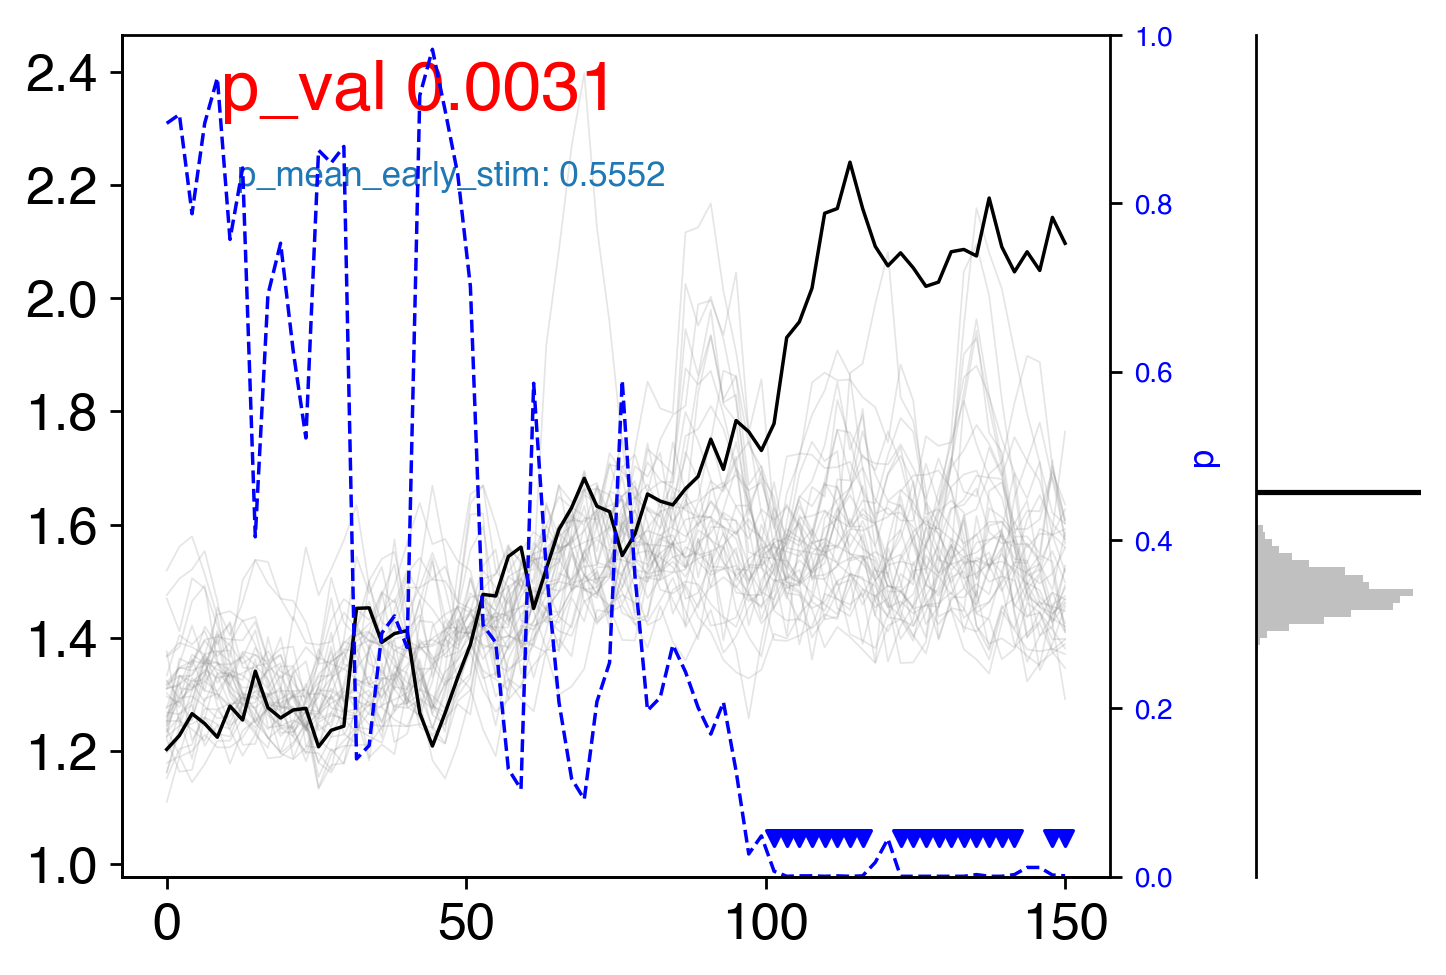

In [333]:
reg = 'PRNc'
dist='de'
ptype = 'p_mean_c'
alpha = 0.01
p_mean_early=True

# timeframes=['act_block_duringstim']
# timeframes=['act_intertrial0', 'act_intertrial0_old']
# timeframes=['act_intertrial0']
timeframes=['choice_duringstim_act']
# timeframes=['stim_duringstim1_act']
for timeframe in timeframes:

    # for split in splits:
    #     print(split)
    #     plot_regional_distance(reg, split, timeframe, ptype=ptype, plot_p_per_time=True)
    r = plot_regional_distance(reg, timeframe, ptype=ptype, alpha=alpha, dist=dist,
                           plot_p_per_time=True, plot_gain=False, plot_offset=False,
                           show_y=True, ylim=None, yticks=None, p_mean_early=p_mean_early)

# plot_regional_distance(reg, 'block_only', timeframe, ptype=ptype, plot_p_per_time=True)

In [131]:
init_mask = np.ones(10, dtype=bool)
train_mask = [0,2]


In [ ]:
# reg='SIM'
ptype = 'p_mean_c'

timeframe='stim_duringchoice0'
splits = run_align[timeframe]
combined_name = 'combined_regde_'+"_".join(splits)

# regs = ['GRN', 'MRN', 'IRN']
regs = ['MOs', 'SIM', 'IP', 'RN', 'APN', 'SCm', 
            #    'PF'
               ]

# regs = ['GRN', 'GPi', 'SNr']
# regs = ['SIM', 
#             #    'DEC', 
#                'CLA', 
#                'PCG', 
#             #    'SSs', 
#                'ACAd', 'MOs', 'RN', 'SMT']

for reg in regs:
    plot_regional_distance(reg, combined_name, timeframe, ptype=ptype, plot_p_per_time=True)


amp_int 0.046519817546356146
amp_move 0.09815467409212819
amp_move/amp_int 2.10995397809372
amp_int 0.04113589205723067
amp_move 0.08333255978364296
amp_move/amp_int 2.0257871074658063


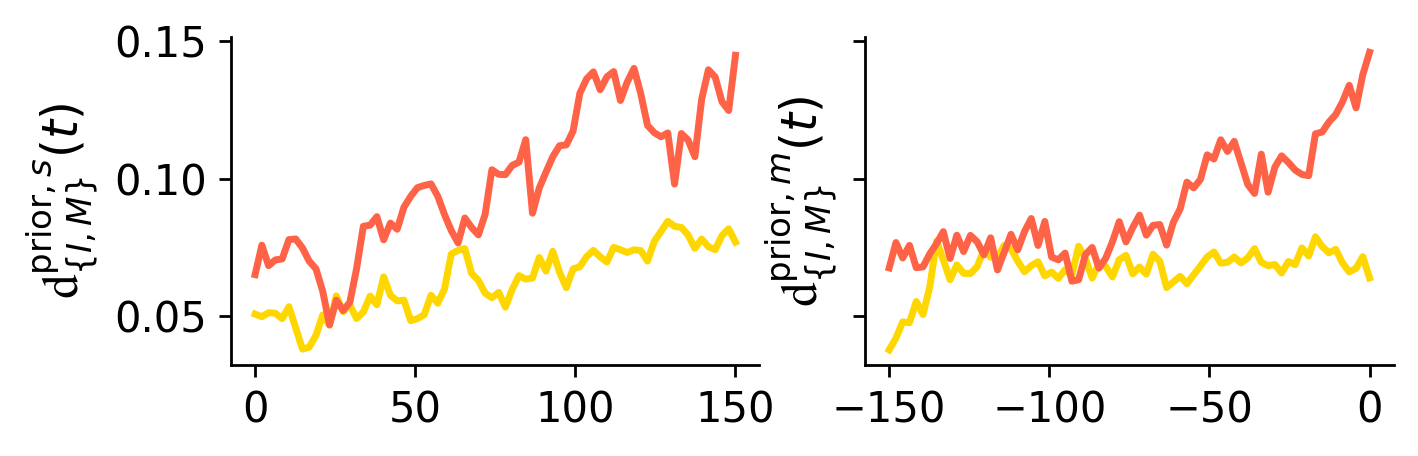

In [108]:
# from model_functions import *
timeframes = ('act_block_duringstim', 'act_block_duringchoice')
# timeframes = ('choice_duringstim_act', 'choice_duringchoice_act')

# regs_move = list(set(move_regs_stim) | set(move_regs_choice))
# regs_int = list(set(int_regs_stim) | set(int_regs_choice))

# regions = {'int_regs_choice': int_regs_choice, 'int_regs_stim': int_regs_stim,
#            'move_regs_choice': move_regs_choice, 'move_regs_stim': move_regs_stim}
# regions = {'int_regs_choice': regs_int, 'int_regs_stim': regs_int,
#            'move_regs_choice': regs_move, 'move_regs_stim': regs_move}
regions = {'int_regs_choice': all_int, 'int_regs_stim': all_int,
           'move_regs_choice': all_move, 'move_regs_stim': all_move}

dist='de'
# amp_ratio_choice, offset_ratio_choice = plot_group_comparison_over_regions(regions, timeframes)
amp_ratio_block, offset_ratio_block = plot_group_comparison_over_regions(regions, timeframes,
        correction='simple', dist=dist)

/Users/ariliu/int-brain-lab/paper-brain-wide-map/analysis_functions.py:889: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


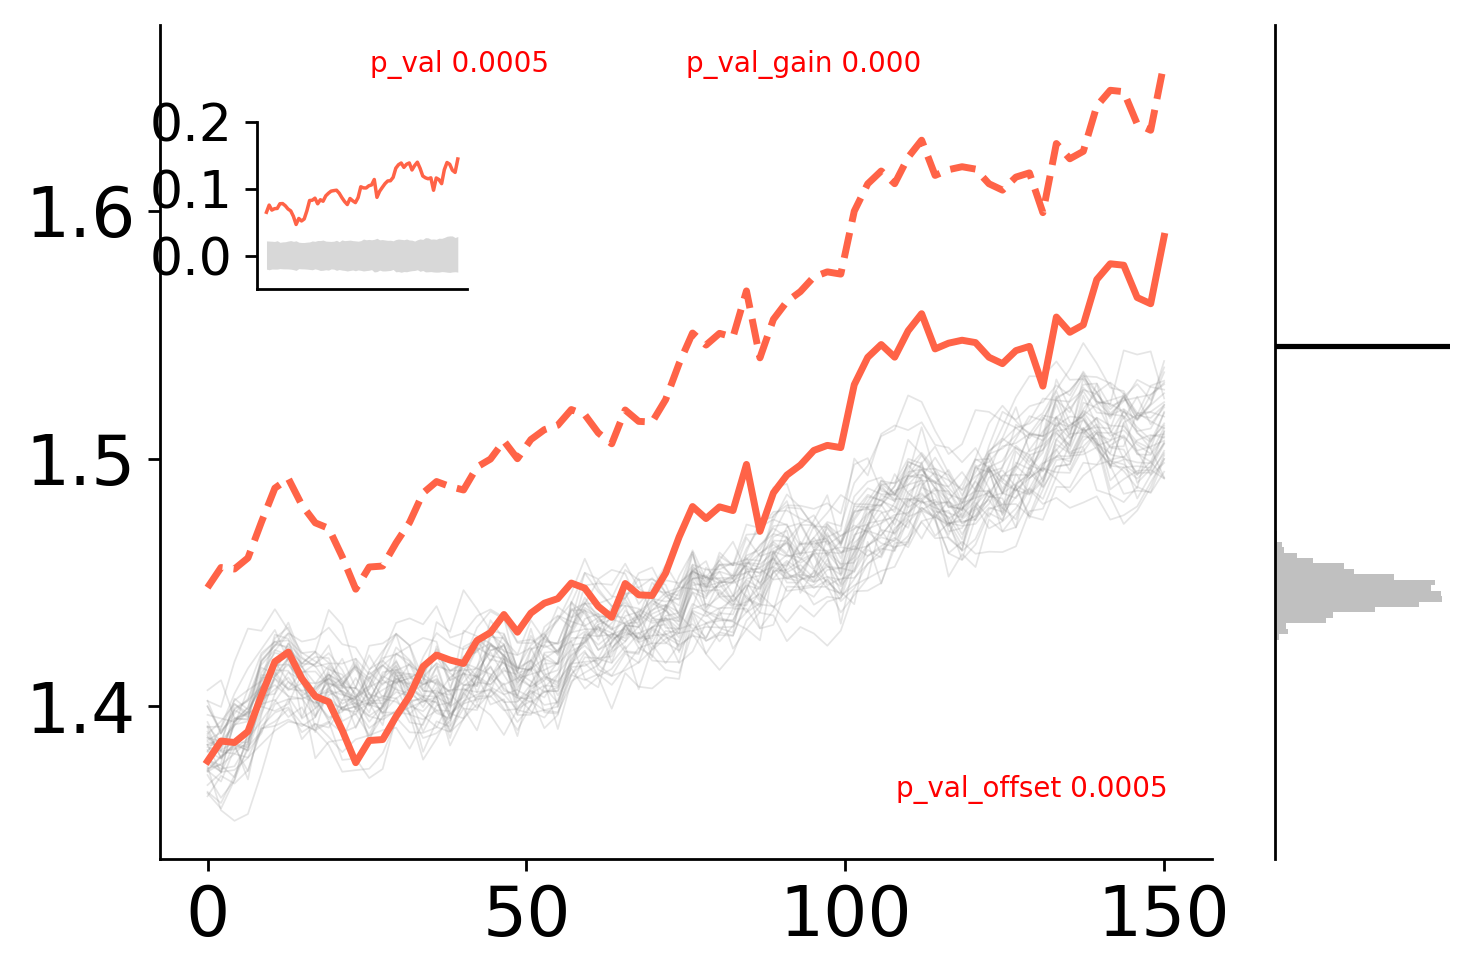

In [109]:
stim_regs = ['VISpm', 'VISal', 'FRP']
# stim_regs = ['VISpm', 'VISam', 'FRP', 'VISp', 'VISli', 'LGd', 'LP', 'NOT']
regs = all_move
# regs = stim_regs
name = 'move_regs'

timeframe='act_block_duringstim'
# timeframe='choice_duringstim_act'
# timeframe='intertrial'
# splits = run_align[timeframe]
# combined_name = 'combined_regde_'+"_".join(splits)

r_avg = plot_average_distance_over_regions(regs, timewindow=timeframe, name=name,
                                   ptype='p_mean_c', show_y=True, alpha=0.05,
                                   plot_p_per_time=False, plot_gain=True)

# for reg in regs:
#     plot_regional_distance(reg, timeframe, ptype=ptype, alpha=0.05, plot_p_per_time=True)
#     plt.close()

In [ ]:
plot_average_distance_over_regions(['GRN', 'SIM'], timewindow='block_duringchoice', name='move_regs', plot_p_per_time=False)
# plot_group_comparison_over_regions(['MOs'], ['GRN', 'SIM'], 'block_duringchoice')

In [ ]:
def get_line_plots(meta_split, regs, color, p_type=None, restr=True):
    '''
    plot average all detailed splits' trajectories during a timeframe
    restr: restricted to only correct trials
    '''
    
    splits = meta_splits[meta_split]
    if restr:
        splits = splits[:2]
    d = {}
    for split in splits:
        d[split] = 0
        for reg in regs:
            r = np.load(Path(pth_res,f'{split}.npy'),
                        allow_pickle=True).flat[0][reg]
            if p_type==None:
                d[split] += r['d_euc']
            else:
                r['significant'] = r[p_type]<sigl
                d[split] += r['d_euc'] * r['significant']

    d = pd.DataFrame(data=d)
    d['sum'] = d[splits].apply(np.sum, axis=1)

    xx = np.linspace(-pre_post[meta_split][0], 
                                  pre_post[meta_split][1], 
                                  len(d['sum']))
    yy = d['sum']/len(regs)
    plt.plot(xx,yy,c=color)
    
    
def get_multiple_line_plots(metasplits, reg, labels, p_type=None):
    """
    plot all detailed splits' trajectories during a timeframe
    average over correct & incorrect trials (probably not useful)
    """

    col = ['b', 'r', 'y', 'g', 'c', 'orange']
    for meta_split in metasplits:
        splits = meta_splits[meta_split]
        d = {}
        for split in splits:
            r = np.load(Path(pth_res,f'{split}.npy'),
                        allow_pickle=True).flat[0][reg]
            if p_type==None:
                d[split] = r['d_euc']
            else:
                r['significant'] = r[p_type]<sigl
                d[split] = r['d_euc'] * r['significant']

        xx = np.linspace(-pre_post[meta_split][0], 
                         pre_post[meta_split][1], 
                         len(d[split]))
        for i in range(0,6):
            yy = (d[splits[i]] + d[splits[i+6]]) / 2
            plt.plot(xx,yy, c = col[i])
        
    plt.legend(labels)
    plt.title(reg)

    
def get_multiple_line_plots_0(metasplits, reg, labels, p_type=None):
    """
    plot detailed splits' trajectories during a timeframe
    restricted to correct/incorrect subset of trials only
    """
    
    #col = sns.color_palette('flare', 6)
    col = ['#e3685c', '#e98d6b', '#b13c6c', '#8f3371', '#d14a61', '#6c2b6d']
    for meta_split in metasplits:
        splits = meta_splits[meta_split]
        d = {}
        i = 0
        for split in splits:
            r = np.load(Path(pth_res,f'{split}.npy'),
                        allow_pickle=True).flat[0][reg]
            if p_type==None:
                d[split] = r['d_euc']
            else:
                r['significant'] = r[p_type]<sigl
                d[split] = r['d_euc'] * r['significant']

            xx = np.linspace(-pre_post[meta_split][0], 
                         pre_post[meta_split][1], 
                         len(d[split]))
            yy = d[split]
            plt.plot(xx,yy, c = col[i])
            i+=1
        
    #plt.legend(labels)
    plt.xlabel('Time(s)')
    plt.ylabel('Euclidean Distance')
    plt.title(reg)
    xticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35]
    ticklabels = ['0','0.05','0.1','0.15','-0.15','-0.1','-0.05','0']
    plt.xticks(xticks, ticklabels)
    plt.savefig('/Users/ariliu/Desktop/'+reg+'_lineplots.pdf', dpi=300)

In [ ]:
p_type = None #'p_euc_c1' 'p_euc'
reg = 'GRN'

labels = ['block difference, choice R', 'block difference, choice L',
          'choice difference, block L', 'choice difference, block R',
          'discordant, different block & choice', 'concordant, different block & choice'
         ]

#metasplits = ['intertrial_all_0', 'duringstim_all_0', 'duringchoice_all_0']
metasplits = ['duringstim_all_0', 'duringchoice_all_0']
#metasplits = ['duringstim_subset', 'duringchoice_subset']
get_multiple_line_plots_0(metasplits, reg, labels, p_type)

#metasplits = ['duringstim_all', 'duringchoice_all']
#metasplits = ['intertrial_all', 'duringstim_all', 'duringchoice_all']
#get_multiple_line_plots(metasplits, reg, labels, p_type)

In [ ]:
nrand = 2000

p_type = 'p_euc_c1' #None #'p_euc'
regs_c = ['GRN','PAG','AIv','MOp','RSPagl', 'CENT3'] #'AIv','MOp','RSPagl'
regs_s = ['IRN','MOs','MRN','CENT3']
regs = regs_c
colors = {
    'c':'tomato',
    's':'gold'
}
color = colors['c']

meta_split = 'duringchoice'
splits = meta_splits[meta_split]
splits = splits[:2]


In [ ]:
d = {}
n=0
for split in splits:
    for reg in regs:
        r = np.load(Path(pth_res,f'{split}.npy'),
                    allow_pickle=True).flat[0][reg]
        regde = np.load(Path(pth_res,f'{split}_regde.npy'),
                    allow_pickle=True).flat[0][reg]
        r['significant'] = r[p_type]<sigl
        n+=1 if r['significant'] else 0
        if 'true' not in d:
            d['true'] = np.zeros_like(regde[0], dtype=float) 
        d['true'] += regde[0] * r['significant']
        for i in range(len(regde[1:])):
            key = f'ctrl_{i}'
            if key not in d:
                d[key] = np.zeros_like(regde[i+1], dtype=float)
            d[key] += regde[i+1] * r['significant']
            
d['true'] = d['true']/n
for i in range(nrand):
    d[f'ctrl_{i}'] = d[f'ctrl_{i}']/n

xx = np.linspace(-pre_post[meta_split][0], 
                                pre_post[meta_split][1], 
                                len(d['true']))
yy = d['true']
plt.plot(xx,yy,c=color)
for i in range(nrand):
    plt.plot(xx, d[f'ctrl_{i}']/n, c='gray', alpha=0.5)


In [ ]:
### plot avg block L-R distance for stim integrators vs choice generators

p_type = 'p_euc_c1' #None #'p_euc'
regs_c = ['GRN','PAG','AIv','MOp','RSPagl', 'CENT3'] #'AIv','MOp','RSPagl'
regs_s = ['IRN','MOs','MRN','CENT3']
regs = {
    'c':regs_c,
    's':regs_s
}
colors = {
    'c':'tomato',
    's':'gold'
}


for regtype in ['c','s']:
    for meta_split in ['duringstim', 'duringchoice']: #'intertrial'
        get_line_plots(meta_split, regs[regtype], colors[regtype], p_type)
        
plt.xlabel('Time(s)')
plt.ylabel('Average Block L-R Euclidean Distance')
xticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35]
ticklabels = ['0','0.05','0.1','0.15','-0.15','-0.1','-0.05','0']
plt.xticks(xticks, ticklabels)
plt.savefig('/Users/ariliu/Desktop/avgd.pdf',dpi=300)

In [ ]:
def get_sc_line_plots(sc_splits, reg, stype=None, p_type=None):
    
    for meta_split in sc_splits:
        splits = meta_splits[meta_split]
        r0 = np.load(Path(pth_res,f'{splits[0]}.npy'),
                    allow_pickle=True).flat[0][reg]
        r1 = np.load(Path(pth_res,f'{splits[1]}.npy'),
                    allow_pickle=True).flat[0][reg]

        if p_type==None:
                d = r1['d_euc'] / (r0['d_euc'] + r1['d_euc'])
        else:
                r0['significant'] = r0[p_type]<sigl
                r1['significant'] = r1[p_type]<sigl
                d = r1['d_euc'] * r1['significant'] / (
                    r0['d_euc'] * r0['significant'] + r1['d_euc'] * r1['significant'])

        xx = np.linspace(-pre_post[meta_split][0], 
                                  pre_post[meta_split][1], 
                                  len(d))
        yy = d
        plt.plot(xx,yy)

In [ ]:
sc_splits = ['sc_duringstim', 'sc_duringchoice']
get_sc_line_plots(sc_splits, 'MV', 'p_euc_c1')

## process data p values

In [351]:
# for timeframe in run_align:
# for timeframe in ['act_block_duringstim', 'act_block_duringchoice']:
# for timeframe in ['block_duringstim', 'block_duringchoice', 'intertrial0']:
# for timeframe in ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 
#         'choice_duringchoice_act', 'stim_duringstim_short_act', 'stim_duringstim1_act']:
for timeframe in ['stim_duringstim', 'choice_duringstim', 'stim_duringchoice', 
        'choice_duringchoice', 'stim_duringstim_short', 'stim_duringstim1']:
# for timeframe in ['act_intertrial_old']:
# for timeframe in ['act_intertrial0']:
    compute_amp_slope(timeframe, n=20)

In [386]:
dist='de'
# times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act',
#          'stim_duringstim_short_act']
# times = ['block_duringstim', 'block_duringchoice', 'intertrial', 'intertrial0']
# times = ['stim_duringstim_short_act']
times = ['act_block_duringstim', 'act_block_duringchoice']
# times = ['act_intertrial_old']
# times = ['act_intertrial0']

for ptype in ['p_mean', 'p_amp', 'p_max', 'p_gain', 'p_offset']:
# for ptype in ['p_gain', 'p_offset']:
    for timeframe in times:
        compute_p_value(timeframe, ptype=ptype, dist=dist)
        fdr_combined(timeframe, ptype=ptype)

In [ ]:
timeframe = 'choice_duringstim'
splits = run_align[timeframe]
combined_name = 'combined_'+"_".join(splits)

d = np.load(Path(pth_res, f'{combined_name}.npy'), 
                    allow_pickle=True).flat[0]
for reg in ['GRN', 'VISp']:
    print(reg)
    print(d[reg]['p_mean'])
    print(d[reg]['p_mean_c'])
    print(d[reg]['p_amp'])
    print(d[reg]['p_amp_c'])
    print(d[reg]['p_max'])
    print(d[reg]['p_max_c'])
    # break


## plot tables

In [69]:
# set parameters

ptype = 'p_mean_c'
combined_p = True
sc_threshold = 0.0
slope_threshold = 0.05
amp_loc_threshold = 67
n = 20

In [ ]:
# datatype = 'true_block'
# times = ['intertrial']
# times = ['block_duringchoice', 'block_duringstim', 'intertrial0']
# datatype = 'act_block'
# times=['act_intertrial0']
# times = ['act_intertrial_old']
# times = ['act_block_duringchoice', 'act_block_duringstim']
# datatype = 'stim_choice_act'
# times = ['stim_duringstim_short_act', 'stim_duringstim1_act', 'stim_duringstim_act', 'choice_duringstim_act', 
#          'stim_duringchoice_act', 'choice_duringchoice_act']

for alpha in [0.01]:
    table = plot_table(times, ptype=ptype, alpha=alpha, datatype=datatype)

# times = ['stim_duringstim0', 'choice_duringstim0', 'stim_duringchoice0', 'choice_duringchoice0']
# table = plot_table_combined(times, ptype=ptype, datatype='stimchoice0', alpha=alpha)

# times = ['stim_duringstim', 'choice_duringstim', 'stim_duringchoice', 'choice_duringchoice']
# table = plot_table_combined(times, ptype=ptype, datatype='stimchoice', alpha=alpha)

In [145]:
x = table['region'][(table['act_block_duringchoice']>0)|(table['act_block_duringstim']>0)]
len(x)

49

In [116]:
reg_info = pd.read_csv(Path(meta_pth, 'region_info.csv'))
reg_order = reg_info['Beryl']
reg_order.to_csv(Path(meta_pth, 'region_order.txt'), index=False, header=False)

In [305]:
alpha=0.05
# res = manifold_to_csv('act_block_only_old', alpha, p_type='p_mean_c', sample=False)
res = manifold_to_csv('act_block_only', alpha, p_type='p_mean_c', sample=False)

# splits = run_align['act_block_duringstim']
# split_name = 'combined_'+"_".join(splits)
# res = manifold_to_csv(split_name, 0.05, p_type='p_mean_c', sample=False)

x = res[res['significant']==1]['region']
len(x), x

(5,
 12      VISa
 73       AIp
 85     SSp-n
 89       LSr
 207      CLA
 Name: region, dtype: object)

In [ ]:
times = ['stim_duringstim', 'choice_duringstim', 'stim_duringchoice', 'choice_duringchoice']
# times = ['stim_duringstim_act', 'choice_duringstim_act', 
#          'stim_duringchoice_act', 'choice_duringchoice_act']
metric = 'regtype'
# metric = 'move_shape'
# metric = 'sc'

# for alpha in [0.05, 0.01]:
for alpha in [0.01]:
    plot_sc_table(times, ptype, alpha=alpha, metric=metric, sc_threshold=sc_threshold,
                  slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold, n=n, stim_restr=True)

# for time in times:
#     res = manifold_to_csv(time, alpha, ptype)

In [ ]:
# old version
sigl=0.05
# meta_split = 'intertrial_1.0' #'sc_duringstim1' 'intertrial_block_only' 'act_intertrial'
fdr = 'p_euc_c1' #'p_euc_c1' or 'p_euc' or 'p_euc_c'

for meta_split in expanded_meta_splits:
# for meta_split in ['intertrial_1.0']:
    # fdr correction on raw data, for fdr = 'p_euc_c1' correction over splits, and 'p_euc_c' correction over regions
    fdr_splits(meta_split, sigl)
    fdr_reg(meta_split, sigl)
    
    # load data to csv files
    manifold_to_csv(meta_split, sigl, fdr)
    
    res = plot_table(meta_split, 'amp', fdr)
    res.to_html(Path(meta_pth,f'table_{meta_split}.html'))

In [356]:
# times = ['stim_duringstim', 'choice_duringstim', 'stim_duringchoice', 'choice_duringchoice']
times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act']

timing_splits = ['act_block_duringchoice', 'act_block_duringstim']
# timing_splits = ['block_duringchoice', 'block_duringstim']

for sigl in [0.05, 0.01]:
    table = plot_combined_table_summary(times, timing_splits, ptype=ptype, alpha=sigl, alpha_sc=sigl,
                                combined_p=combined_p, sc_threshold=sc_threshold,
                                slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold, n=n,
                                display='overall')


In [ ]:
# old
sigl = 0.05
ptype = 'p_euc_c1' #'p_euc_c1' 'p_euc'
times = ['duringstim','act_duringstim','duringchoice',
         'act_duringchoice','intertrial','act_intertrial']
blocktype = 'all' #'true' 'act' 'all'

for meta_split in times:
    if ptype == 'p_euc_c1':
        plot_tables.fdr_splits(meta_split, sigl)
    elif ptype == 'p_euc_c':
        plot_tables.fdr_reg(meta_split, sigl)

    manifold_to_csv(meta_split,sigl,ptype)
    
plot_block_alltimes(times, ptype, blocktype)

In [ ]:
times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act']
alpha = 0.01
res = get_sc_table(times, ptype, alpha=alpha, sc_threshold=sc_threshold, 
                       slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold, n=n)

In [173]:
int_regs = res['region'][res['sc_duringstim_regtype']==0.5]
move_regs = res['region'][res['sc_duringchoice_regtype']==1]

In [175]:
len(int_regs)

49

In [ ]:
vis_r = set(res['region'][res['sc_duringstim']<=0.1])

In [168]:
int_r = set(res['region'][res['sc_duringstim']<=0.8])
int_r - vis_r

{'BMA',
 'CENT2',
 'CENT3',
 'CUL4 5',
 'DCO',
 'FN',
 'GPe',
 'GRN',
 'ILA',
 'IP',
 'IRN',
 'LING',
 'LPO',
 'MARN',
 'MRN',
 'MV',
 'NOT',
 'PAG',
 'PARN',
 'PF',
 'PGRN',
 'POL',
 'PRNr',
 'RN',
 'SCm',
 'SIM',
 'SMT',
 'SNr',
 'SPIV',
 'VCO',
 'VeCB'}

In [118]:
times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act']
alpha = 0.01

# stim_regs = plot_combined_onetype(times, 'stim', ['act_block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
#                       sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
# move_regs_choice = plot_combined_onetype(times, 'move', ['act_block_duringchoice'], ptype=ptype, combined_p=combined_p, n=n,
#                       sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
int_regs_stim = plot_combined_onetype(times, 'integrator', ['act_block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
int_regs_choice = plot_combined_onetype(times, 'integrator', ['act_block_duringchoice'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
# move_regs_stim = plot_combined_onetype(times, 'move', ['act_block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
#                       sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)


sc_duringstim_regtype act_block_duringstim
sc_duringchoice_regtype act_block_duringchoice


In [215]:
stim_regs_all = plot_combined_onetype(times, 'stim', ['act_block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold,
                      stim_criteria='loose')


sc_duringstim_regtype act_block_duringstim


In [113]:
times = ['stim_duringstim_act', 'choice_duringstim_act', 'stim_duringchoice_act', 'choice_duringchoice_act']
alpha = 0.01

int_regs = plot_combined_onetype(times, 'integrator', ['act_block_duringstim', 'act_block_duringchoice'], 
                                      ptype=ptype, combined_p=combined_p, n=n, 
                                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, 
                                      amp_loc_threshold=amp_loc_threshold, add_intertrial=False)

move_regs = plot_combined_onetype(times, 'move', ['act_block_duringstim', 'act_block_duringchoice'], 
                                      ptype=ptype, combined_p=combined_p, n=n, 
                                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, 
                                      amp_loc_threshold=amp_loc_threshold, add_intertrial=False)


sc_duringstim_regtype act_block_duringstim
sc_duringchoice_regtype act_block_duringchoice
sc_duringstim_regtype act_block_duringstim
sc_duringchoice_regtype act_block_duringchoice


In [ ]:
alpha = 0.05
times = ['stim_duringstim', 'choice_duringstim', 'stim_duringchoice', 'choice_duringchoice']

stim_regs = plot_combined_onetype(times, 'stim', ['block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
move_regs_choice = plot_combined_onetype(times, 'move', ['block_duringchoice'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
int_regs_stim = plot_combined_onetype(times, 'integrator', ['block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
int_regs_choice = plot_combined_onetype(times, 'integrator', ['block_duringchoice'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
move_regs_stim = plot_combined_onetype(times, 'move', ['block_duringstim'], ptype=ptype, combined_p=combined_p, n=n,
                      sc_threshold=sc_threshold, alpha=alpha, slope_threshold=slope_threshold, amp_loc_threshold=amp_loc_threshold)
